In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats
%matplotlib inline

In [16]:
data = pd.read_csv('data.csv')
data.head()
new = []

for p in range(0,1):
    new.append(1)
for i in range (2,18210):
    new.append(0)
data['BallonDor'] = pd.Series(new)

In [17]:
data = pd.read_csv('data.csv')
data.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
#column = ['National_Position','National_Kit','Club','Club_Position','Club_Kit','Club_Joining','Contract_Expiry','Height','Weight','Preffered_Foot','Birth_Date','Preffered_Position','Work_Rate']
#fifa17.drop(column, axis=1, inplace=True)

In [19]:
#data["Ballon_D'or"] = data.

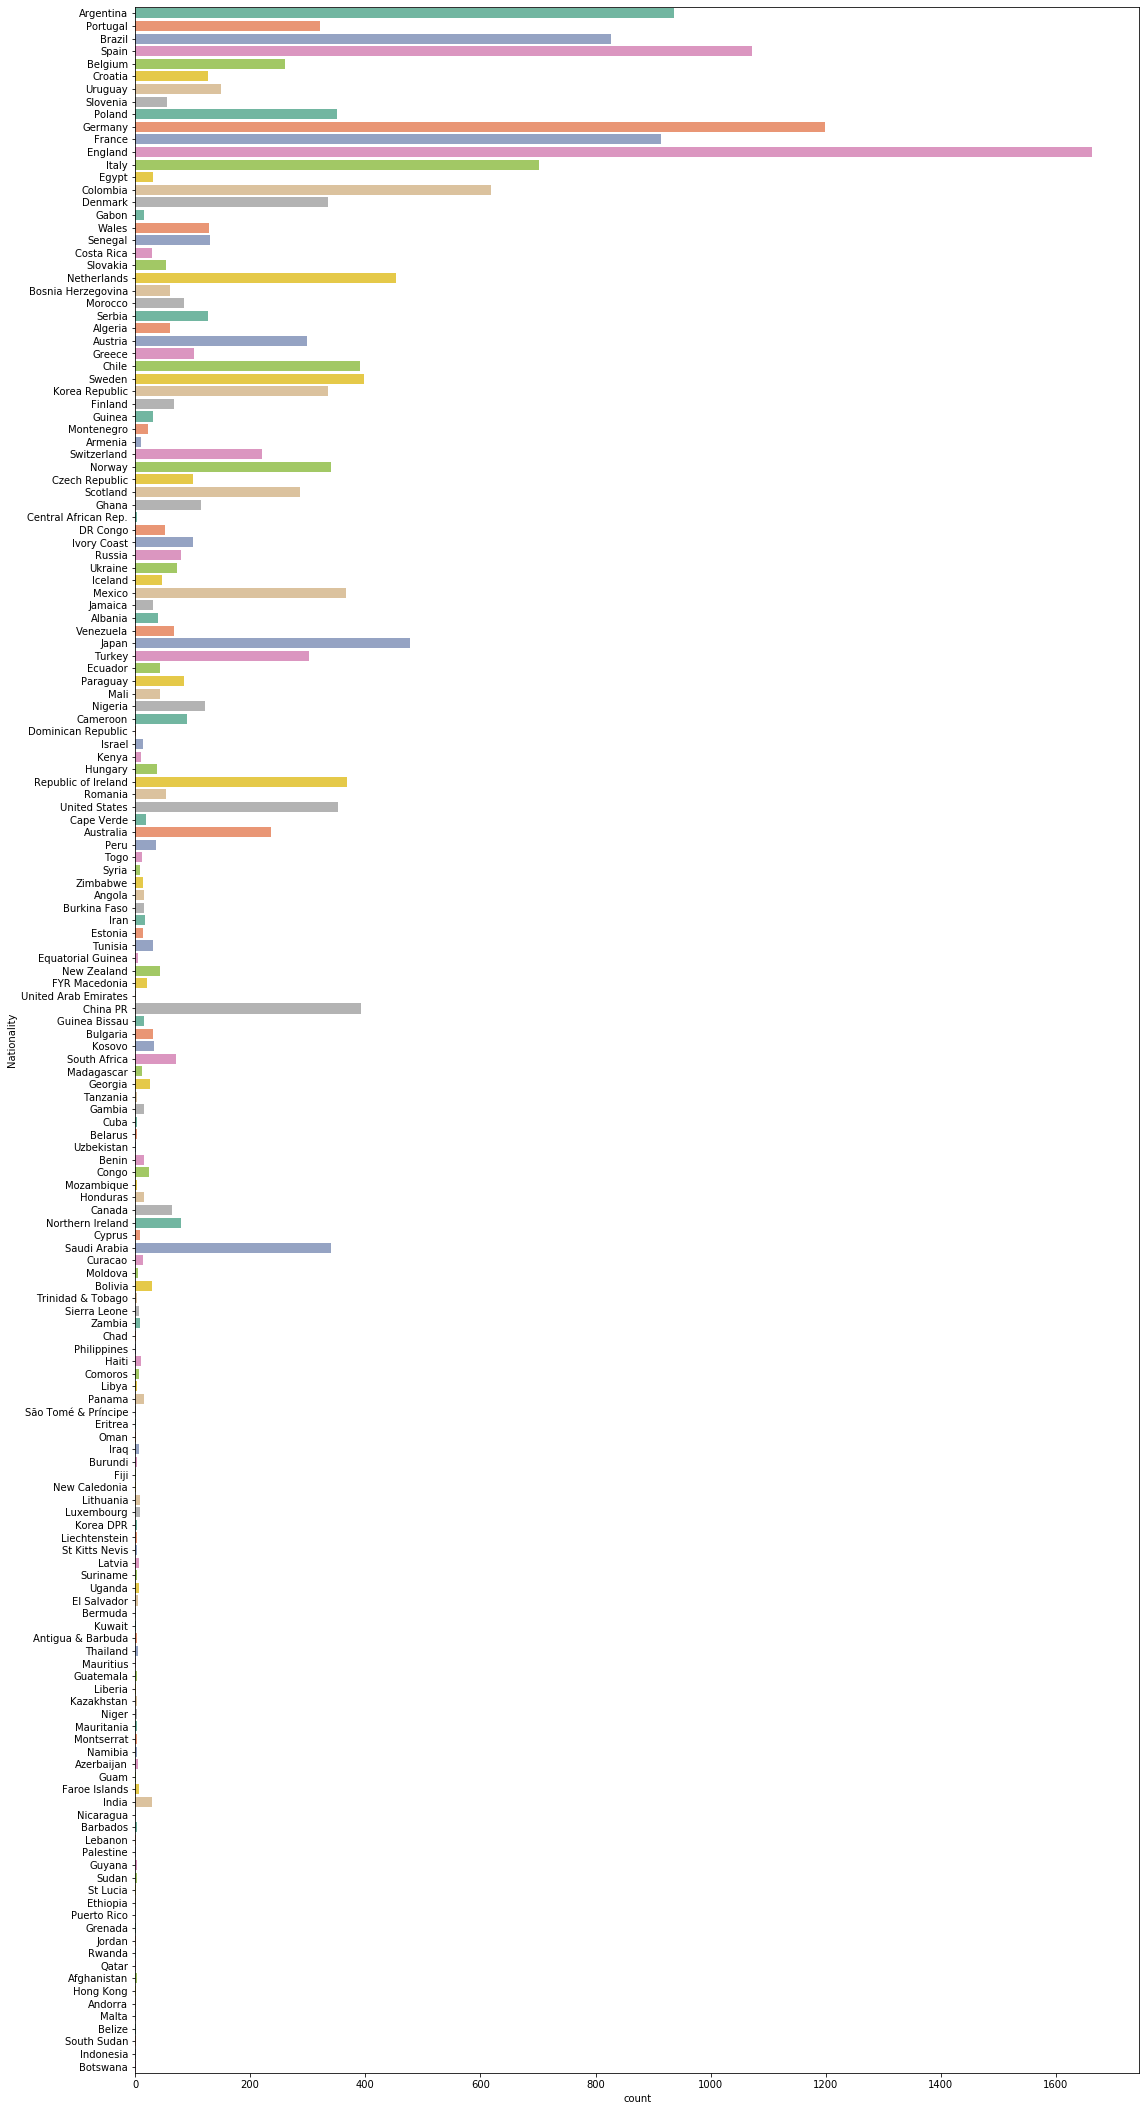

In [20]:
plt.figure(figsize=(18,38))
sns.countplot(y = data.Nationality,palette="Set2")

First we  show the countries of the different players
that are featuring in the 2018/2019 season.
From this, we can see that England has the most value
which denotes larger percentage of the 2018/2019 season
was dominated by english players.
We can also see Germany as another country with large percentage of participant.

Note: The plot gebnerated above shows the countries of each players in the dataset which we'll work with


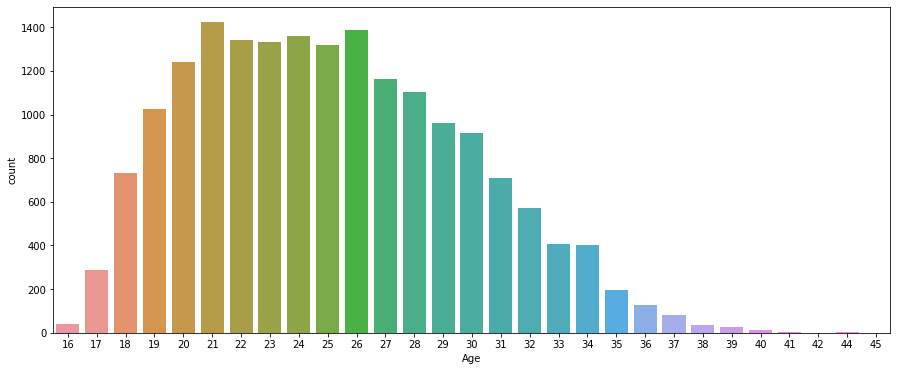

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=data)

The graph is plotted on the y-axis alone


Here ages of the participating players are represented on a plot 
which gives us the dominating ages of players and we can clearly
see that young talents at the age of 21 dominated the scene this season and followed by players 
at their mid-careers 26 years, also had high values of participants,
we can therefore assume that players between the ages of 19 and 29 respectively featured during the season 

In [22]:
#plt.figure(figsize=(15,6))
#sns.countplot(x="Name",data=data)

This shows the ages of the players in the world as at 2019 

In [60]:
a = 0.5
b = 1
c = 2
d = 3
data['gk_Shot_Stopper'] = (a*data.Reactions + d*data.Composure + a*data.Jumping + a*data.GKDiving + b*data.GKReflexes + c*data.GKPositioning + c*data.Interceptions + b*data.GKHandling + b*data.Balance + b*data.Stamina)/(4*a + 4*b + 2*c + 1*d)
data['gk_Sweeper'] = (a*data.Reactions + d*data.Composure + a*data.GKReflexes + a*data.GKKicking + c*data.GKPositioning + a*data.Interceptions)/(4*a + 1*c + 1*d)

Weight were assigned here to 

Now we want to know the best goal keeper, first we need to know the shot stopper goal keeper and also the best goal keeper sweeper, then we observe throught the chart which goal keeper has the highest scores in the chart

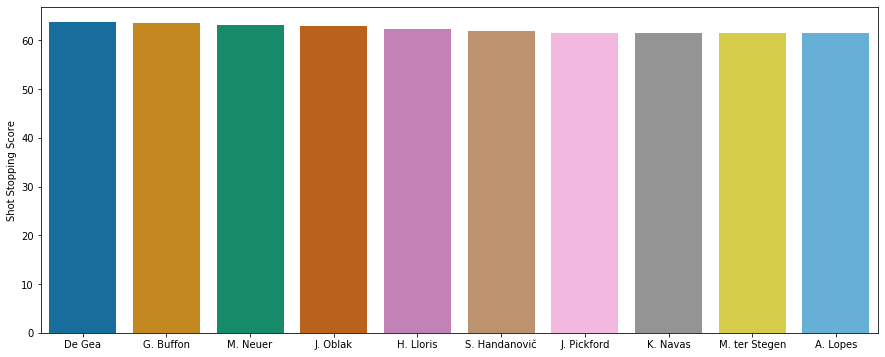

In [64]:
plt.figure(figsize=(15,6))
sd = data.sort_values('gk_Shot_Stopper', ascending=False)[:10]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")
plt.show()

this shows the best goal shot stopper keeper as revealed by the chart

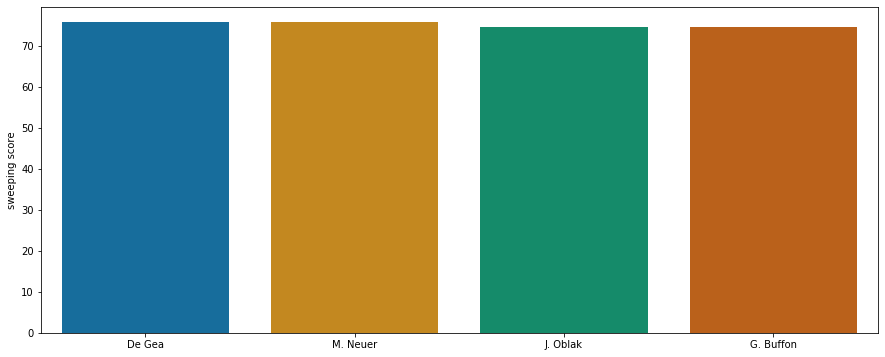

In [65]:
plt.figure(figsize=(15,6))
sd = data.sort_values('gk_Sweeper', ascending=False)[:4]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("sweeping score")
plt.show()

this shows the goal keeper that has the best saves with foot

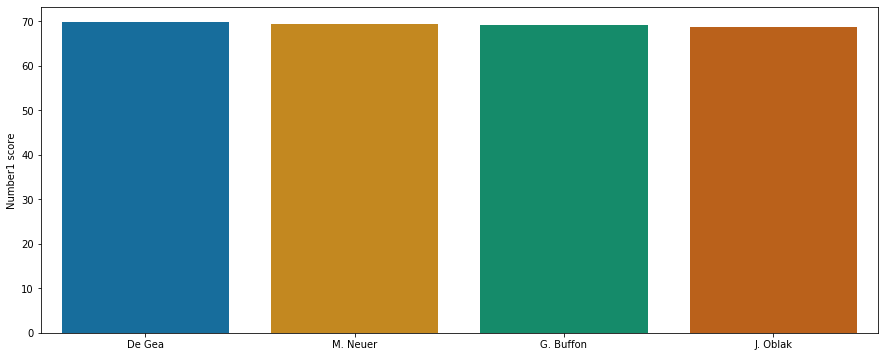

In [68]:
data['best_goal_keeper'] = (a*data.gk_Shot_Stopper + a*data.gk_Sweeper)
plt.figure(figsize=(15,6))
sd = data.sort_values('best_goal_keeper', ascending=False)[:4]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['best_goal_keeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Number1 score")
plt.show()

According to the analysis provided by the graph
David de gea tops the chart after the scores for the best shot stopper and best sweeper. Hence he is the best goal keeper for the year 2019 

In [100]:
a = 0.5
b = 1
c = 2
d = 3
data['data_centre_backs'] = (a*data.Interceptions + a*data.SlidingTackle + a*data.StandingTackle + a*data.Composure + a*data.Strength + b*data.SprintSpeed + a*data.Stamina + b*data.Jumping + a*data.Marking + b*data.Reactions + b*data.Positioning + b*data.Balance)/(7*a + 5*b )
data['data_wb_Wing_Backs'] = (b*data.BallControl + a*data.Marking + a*data.SlidingTackle + a*data.StandingTackle + b*data.Positioning + a*data.Crossing + b*data.ShortPassing + b*data.LongPassing + a*data.Vision + b*data.Strength  + b*data.Balance + b*data.SprintSpeed + c*data.Stamina)/(5*a + 7*b + 1*c)

Text(0, 0.5, 'LCB Score')

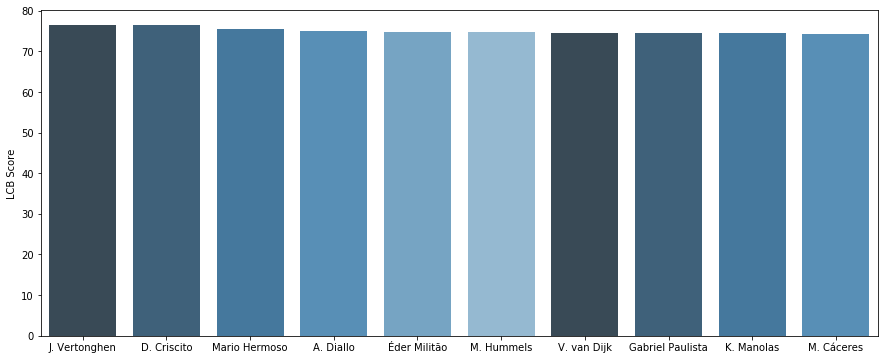

In [101]:
plt.figure(figsize=(15,6))
sd = data[(data['Position'] == 'LCB')].sort_values('data_centre_backs', ascending=False)[:10]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['data_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

Text(0, 0.5, 'RCB Score')

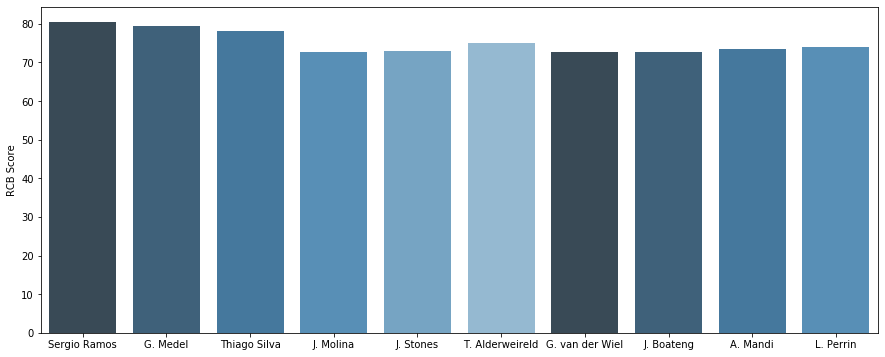

In [103]:
plt.figure(figsize=(15,6))
 
sd = data[(data['Position'] == 'RCB')].sort_values('data_wb_Wing_Backs', ascending=False)[:10]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['data_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

Text(0, 0.5, 'Left Back Score')

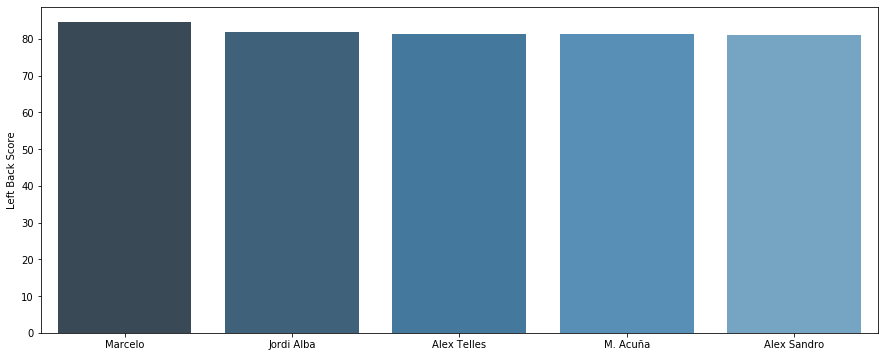

In [104]:
plt.figure(figsize=(15,6))
 
sd = data[(data['Position'] == 'LB')].sort_values('data_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['data_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")


Text(0, 0.5, 'Right Back Score')

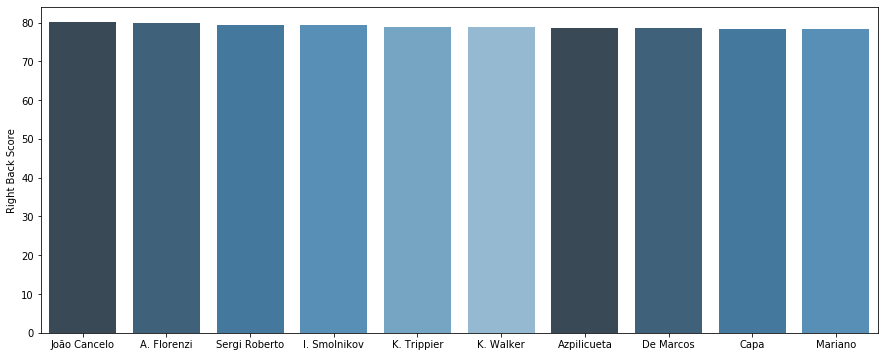

In [105]:
plt.figure(figsize=(15,6))
sd = data[(data['Position'] == 'RB')].sort_values('data_wb_Wing_Backs', ascending=False)[:10]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['data_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")


In [135]:
#PLAYMAKER
data['mf_controller'] = (c*data.BallControl + c*data.Dribbling + d*data.Vision + c*data.Crossing + b*data.Composure + a*data.ShortPassing + a*data.LongPassing)/(3*a + 2*b + 2*c)
data['mf_beast'] = (a*data.Agility + a*data.Balance + a*data.Strength + a*data.Stamina + b*data.SprintSpeed + c*data.Acceleration + c*data.LongPassing + c*data.ShortPassing + a*data.Aggression + d*data.Reactions + a*data.Marking + b*data.StandingTackle + b*data.SlidingTackle + a*data.Interceptions)/(7*a + 3*b + 3*c + 1*d)
data['mf_playmaker'] = (d*data.BallControl + b*data.Dribbling + d*data.Marking + b*data.Reactions + a*data.Vision + a*data.Composure + a*data.ShortPassing + a*data.LongPassing)/(3*c + 3*d + 2*b + 1*d)


Text(0, 0.5, 'PlayMaker Score')

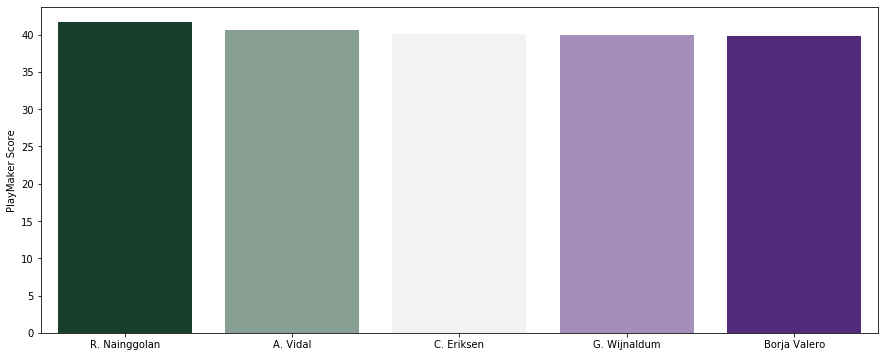

In [136]:
plt.figure(figsize=(15,6))
 
ss = data[(data['Position'] == 'CAM') | (data['Position'] == 'LAM') | (data['Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")


Text(0, 0.5, 'Beast Score')

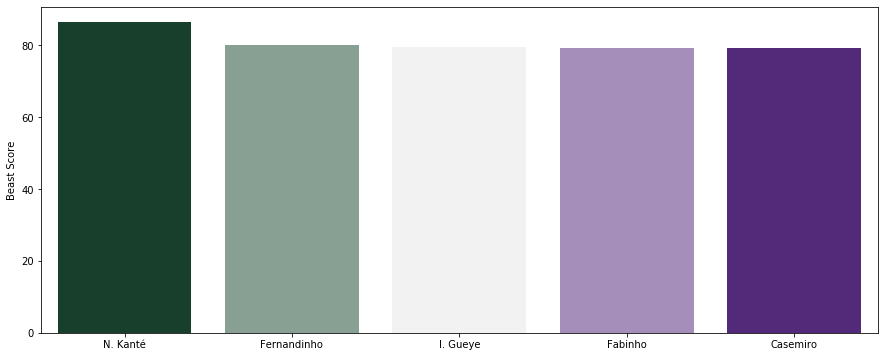

In [137]:
plt.figure(figsize=(15,6))
 
ss = data[(data['Position'] == 'RDM') | (data['Position'] == 'LDM') | (data['Position'] == 'CDM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")


Text(0, 0.5, 'Controller Score')

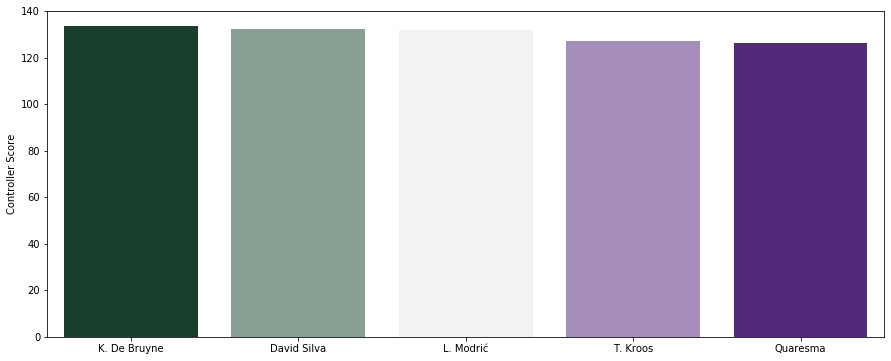

In [138]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = data[(data['Position'] == 'LCM') | (data['Position'] == 'LM') | (data['Position'] == 'RCM') | (data['Position'] == 'RM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")


In [152]:
#Attackers
data['att_left_wing'] = (c*data.BallControl + b*data.Dribbling + b*data.SprintSpeed + b*data.Acceleration + b*data.Vision + c*data.Crossing + b*data.ShortPassing + b*data.LongPassing + b*data.Aggression + b*data.Agility + a*data.Curve + b*data.LongShots + a*data.FKAccuracy + a*data.Finishing)/(3*a + 9*b + 2*c)
data['att_right_wing'] = (c*data.BallControl + b*data.Dribbling + a*data.SprintSpeed + b*data.Acceleration + c*data.Vision + a*data.Crossing + b*data.ShortPassing + b*data.LongPassing + c*data.Aggression + b*data.Agility + a*data.Curve + b*data.LongShots + a*data.FKAccuracy + a*data.Finishing)/(5*a + 6*b + 3*c)
data['att_striker'] = (a*data.BallControl + a*data.Vision + b*data.Aggression + b*data.Agility + a*data.Curve + a*data.LongShots + a*data.Balance + a*data.Finishing + a*data.HeadingAccuracy + b*data.Jumping + c*data.Dribbling)/(7*a + 3*b + 1*c)


Text(0, 0.5, 'Left Wing')

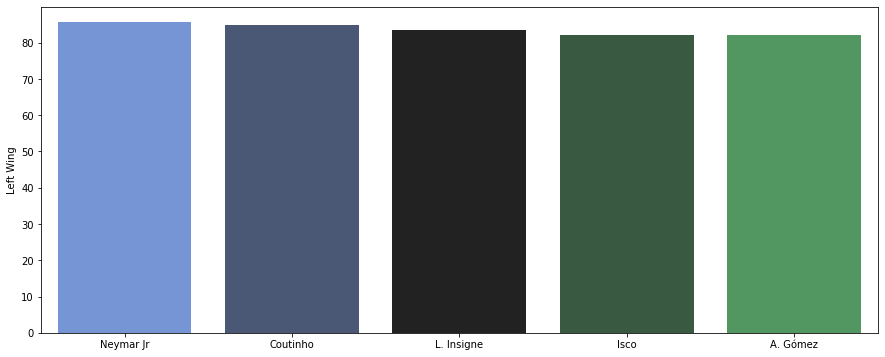

In [153]:
plt.figure(figsize=(15,6))
 
ss = data[(data['Position'] == 'LS') | (data['Position'] == 'LW')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")


Text(0, 0.5, 'Right Wing')

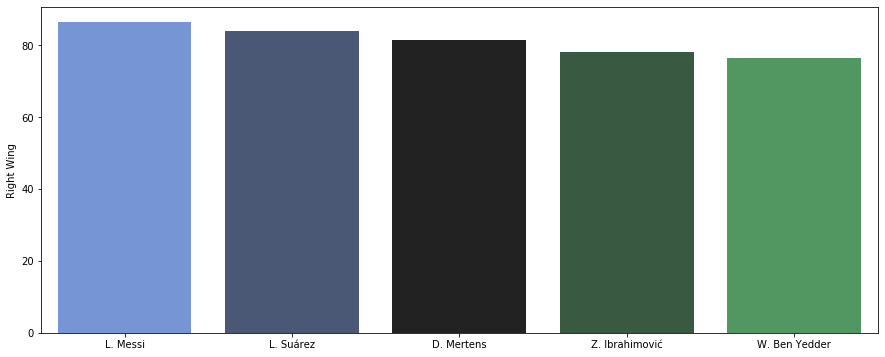

In [154]:
plt.figure(figsize=(15,6))
 
ss = data[(data['Position'] == 'RF') | (data['Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")


Text(0, 0.5, 'Striker')

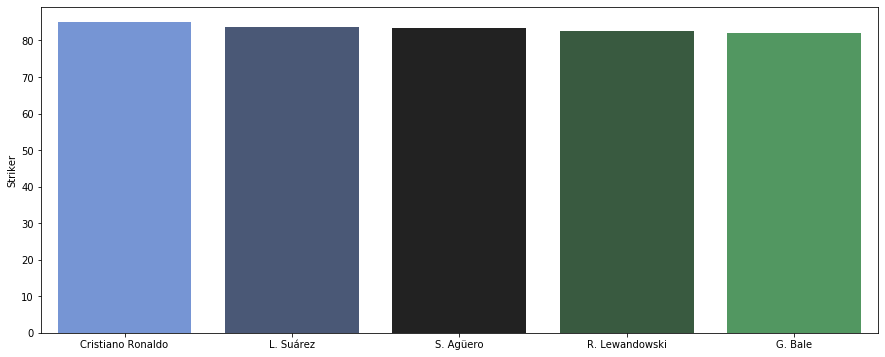

In [155]:
plt.figure(figsize=(15,6))
ss = data[(data['Position'] == 'ST') | (data['Position'] == 'LS') | (data['Position'] == 'RS') | (data['Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")


In [ ]:
data['best_player'] =(a*data.att_right_wing + a*data.best_goal_keeper + a*data.Agility + a*data.Curve + a*data.LongShots + a*data.Balance + d*data.Finishing + a*data.HeadingAccuracy + b*data.Dribbling + d*data.Stamina + b*data.Jumping + d*data.FKAccuracy + c*data.Vision + b*data.Composure)/(4*a + 2*b + 2*c + 3*d)
plt.figure(figsize=(15,6)) 
ss = data[(data['Position'] == 'ST') | (data['Position'] == 'LS') | (data['Position'] == 'RS') | (data['Position'] == 'CF') | (data['Position'] == 'RW') | (data['Position'] == 'RM') | (data['Position'] == 'RS') | (data['Position'] == 'LW') | (data['Position'] == 'LM') | (data['Position'] == 'LS') | (data['Position'] == 'LCM') | (data['Position'] == 'LM') | (data['Position'] == 'RCM') | (data['Position'] == 'RM') | (data['Position'] == 'CAM') | (data['Position'] == 'LAM') | (data['Position'] == 'RAM') | (data['Position'] == 'RWB') | (data['Position'] == 'RB') | (data['Position'] == 'LWB') | (data['Position'] == 'LB') | (data['Position'] == 'RCB') | (data['Position'] == 'LCB')].sort_values('best_player', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['best_player']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Ballond'or winner")


In [ ]:
plt.figure(figsize=(10,26))
sns.countplot(x = data.Height,palette="Set2")

According to the stats given by the barplot we get to know that
Cristiano Ronaldo is the  best player in the world for the year 2019